# Taller 1 - Toma de Decisiones II (2026-01)
## Análisis de Desechos Textiles en Latinoamérica

**Industria Textil - Consultora de Sostenibilidad**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sp_stats
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

## 1. Carga y Exploración Inicial de los Datos

In [2]:
df = pd.read_excel('Textiles.xlsx')
df.columns = df.columns.str.strip()
# Limpiar espacios en columnas categóricas
df['Mes'] = df['Mes'].str.strip()
print(f'Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas')
print(f'Columnas: {df.columns.tolist()}')
df.head(10)

Dimensiones: 500 filas x 13 columnas
Columnas: ['Toneladas', 'Ventas', 'Produccion', 'Inventario', 'Algodón', 'Nailon', 'Poliéster', 'Energia', 'Productividad', 'Proteccion', 'Agua', 'Ciudad', 'Mes']


,Toneladas,Ventas,Produccion,Inventario,Algodón,Nailon,Poliéster,Energia,Productividad,Proteccion,Agua,Ciudad,Mes
0,452.397448,113.760530,4.455081,0.101229,0.310349,0.697640,0.570581,15.104008,10.028027,5.784791,93.172686,Mexico,Abril
1,457.627048,83.722951,9.128466,0.223221,0.301188,0.420246,0.400223,22.962038,4.229825,4.434973,118.451674,Bogota,Julio
2,147.431386,49.195238,4.099075,0.241258,0.271961,0.449631,0.426938,16.114847,9.444439,6.014669,47.313600,Medellin,Junio
3,466.290224,113.159173,7.956515,0.261142,0.238601,0.537801,0.543456,8.765975,13.703563,3.703143,115.301391,Mexico,Diciembre
4,381.342868,110.769134,10.026210,0.233265,0.254757,0.580895,0.537177,17.269590,14.446883,4.548506,97.999086,Santiago,Abril
5,495.796854,122.507200,7.287871,0.382429,0.141415,0.716882,0.660802,12.145272,12.184416,5.561699,95.964682,Medellin,Marzo
6,189.909351,61.548208,7.754253,0.302649,0.297317,0.568556,0.562324,15.351750,17.022410,6.059766,98.622363,Bogota,Marzo
7,702.312025,158.794150,7.904368,0.473437,0.238537,0.680849,0.600772,20.780240,11.079774,5.655569,90.546629,Bogota,Diciembre
8,441.836093,97.077009,9.004951,0.240631,0.326730,0.504332,0.476666,9.251677,5.755794,4.538380,81.915155,Mexico,Abril
9,496.868882,118.970257,8.711206,0.284888,0.262144,0.881646,0.774224,14.856131,14.065512,3.515869,111.313530,Santiago,Abril


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Toneladas      500 non-null    float64
 1   Ventas         500 non-null    float64
 2   Produccion     500 non-null    float64
 3   Inventario     500 non-null    float64
 4   Algodón        500 non-null    float64
 5   Nailon         500 non-null    float64
 6   Poliéster      500 non-null    float64
 7   Energia        500 non-null    float64
 8   Productividad  500 non-null    float64
 9   Proteccion     500 non-null    float64
 10  Agua           500 non-null    float64
 11  Ciudad         500 non-null    str    
 12  Mes            500 non-null    str    
dtypes: float64(11), str(2)
memory usage: 50.9 KB


In [4]:
# Variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
indep_num = [c for c in num_cols if c != 'Toneladas']
print(f'Variables numéricas ({len(num_cols)}): {num_cols}')
print(f'Variables categóricas ({len(cat_cols)}): {cat_cols}')
print(f'Variables independientes continuas ({len(indep_num)}): {indep_num}')

Variables numéricas (11): ['Toneladas', 'Ventas', 'Produccion', 'Inventario', 'Algodón', 'Nailon', 'Poliéster', 'Energia', 'Productividad', 'Proteccion', 'Agua']
Variables categóricas (2): ['Ciudad', 'Mes']
Variables independientes continuas (10): ['Ventas', 'Produccion', 'Inventario', 'Algodón', 'Nailon', 'Poliéster', 'Energia', 'Productividad', 'Proteccion', 'Agua']


In [5]:
df.describe().round(4)

,Toneladas,Ventas,Produccion,Inventario,Algodón,Nailon,Poliéster,Energia,Productividad,Proteccion,Agua
count,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000
mean,393.4595,98.7465,7.8425,0.2493,0.2452,0.5349,0.4871,14.7966,11.8654,4.9792,111.9334
std,126.1157,28.1120,2.1459,0.0987,0.0772,0.1645,0.1464,4.1374,3.0835,1.1888,25.0678
min,2.1679,-10.0994,0.8433,-0.1260,-0.0552,0.0877,0.1168,1.1558,1.5221,1.4460,47.3136
25%,305.8236,80.8443,6.4084,0.1865,0.1940,0.4228,0.3878,11.9567,9.8028,4.1773,95.6714
50%,391.9836,99.7577,7.9068,0.2494,0.2456,0.5403,0.4886,14.7807,11.9118,4.9724,111.3787
75%,473.7323,117.1700,9.2628,0.3105,0.2955,0.6443,0.5816,17.6073,14.0354,5.8226,130.6569
max,809.5659,176.9426,15.2266,0.5592,0.4976,0.9800,0.9260,27.6307,22.0890,8.0874,206.5176


In [6]:
print('Valores nulos por columna:')
print(df.isnull().sum())
print(f'\nCiudades: {df["Ciudad"].unique().tolist()}')
print(f'Meses: {sorted(df["Mes"].unique().tolist())}')
print(f'\nConteo por Ciudad:')
print(df['Ciudad'].value_counts())
print(f'\nConteo por Mes:')
print(df['Mes'].value_counts())

Valores nulos por columna:
Toneladas        0
Ventas           0
Produccion       0
Inventario       0
Algodón          0
Nailon           0
Poliéster        0
Energia          0
Productividad    0
Proteccion       0
Agua             0
Ciudad           0
Mes              0
dtype: int64

Ciudades: ['Mexico', 'Bogota', 'Medellin', 'Santiago']
Meses: ['Abril', 'Agosto', 'Diciembre', 'Enero', 'Febrero', 'Julio', 'Junio', 'Marzo', 'Octubre', 'Septiembre']

Conteo por Ciudad:
Ciudad
Santiago    200
Bogota      131
Mexico      125
Medellin     44
Name: count, dtype: int64

Conteo por Mes:
Mes
Abril         113
Marzo          85
Febrero        79
Diciembre      69
Junio          64
Enero          38
Julio          29
Agosto         16
Septiembre      4
Octubre         3
Name: count, dtype: int64


## Punto 1: Análisis Descriptivo (10/100)
### Estadísticas descriptivas y gráficos para identificar patrones

In [7]:
# Estadísticas descriptivas extendidas
num_df = df[num_cols]
stats = num_df.describe().T
stats['CV%'] = (stats['std'] / stats['mean'] * 100).round(2)
stats['IQR'] = stats['75%'] - stats['25%']
stats['skew'] = num_df.skew().round(4)
stats['kurtosis'] = num_df.kurtosis().round(4)
stats.round(4)

,count,mean,std,min,25%,50%,75%,max,CV%,IQR,skew,kurtosis
Toneladas,500.0,393.4595,126.1157,2.1679,305.8236,391.9836,473.7323,809.5659,32.05,167.9086,0.0762,0.1051
Ventas,500.0,98.7465,28.1120,-10.0994,80.8443,99.7577,117.1700,176.9426,28.47,36.3257,-0.1125,0.3106
Produccion,500.0,7.8425,2.1459,0.8433,6.4084,7.9068,9.2628,15.2266,27.36,2.8544,-0.0811,0.2121
Inventario,500.0,0.2493,0.0987,-0.1260,0.1865,0.2494,0.3105,0.5592,39.59,0.1240,0.1351,0.3720
Algodón,500.0,0.2452,0.0772,-0.0552,0.1940,0.2456,0.2955,0.4976,31.49,0.1016,-0.1176,0.3181
Nailon,500.0,0.5349,0.1645,0.0877,0.4228,0.5403,0.6443,0.9800,30.75,0.2215,0.0324,-0.2287
Poliéster,500.0,0.4871,0.1464,0.1168,0.3878,0.4886,0.5816,0.9260,30.06,0.1938,0.1009,-0.0308
Energia,500.0,14.7966,4.1374,1.1558,11.9567,14.7807,17.6073,27.6307,27.96,5.6506,0.0480,-0.0604
Productividad,500.0,11.8654,3.0835,1.5221,9.8028,11.9118,14.0354,22.0890,25.99,4.2326,-0.1111,0.1609
Proteccion,500.0,4.9792,1.1888,1.4460,4.1773,4.9724,5.8226,8.0874,23.87,1.6454,-0.0990,-0.1494


### Distribución de la variable dependiente: Toneladas de desechos

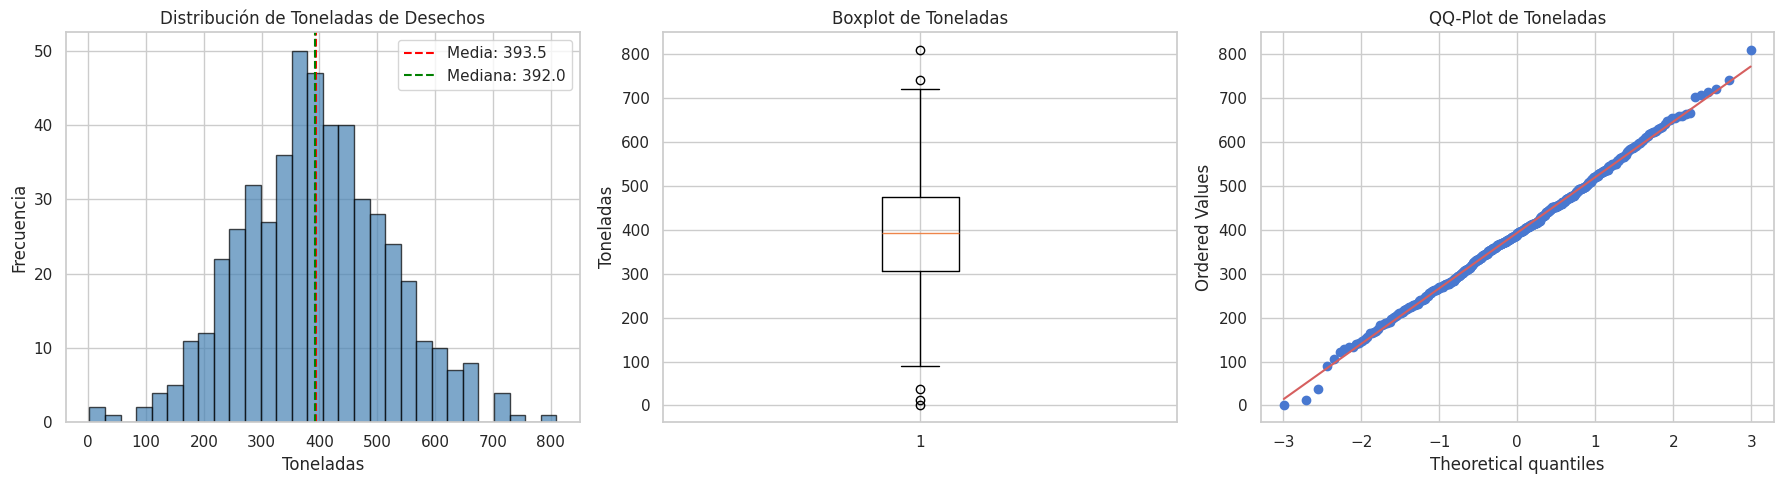

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['Toneladas'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['Toneladas'].mean(), color='red', linestyle='--', label=f'Media: {df["Toneladas"].mean():.1f}')
axes[0].axvline(df['Toneladas'].median(), color='green', linestyle='--', label=f'Mediana: {df["Toneladas"].median():.1f}')
axes[0].set_title('Distribución de Toneladas de Desechos')
axes[0].set_xlabel('Toneladas'); axes[0].set_ylabel('Frecuencia'); axes[0].legend()

axes[1].boxplot(df['Toneladas'], vert=True)
axes[1].set_title('Boxplot de Toneladas'); axes[1].set_ylabel('Toneladas')

sp_stats.probplot(df['Toneladas'], dist='norm', plot=axes[2])
axes[2].set_title('QQ-Plot de Toneladas')
plt.tight_layout(); plt.show()

### Distribución de todas las variables numéricas

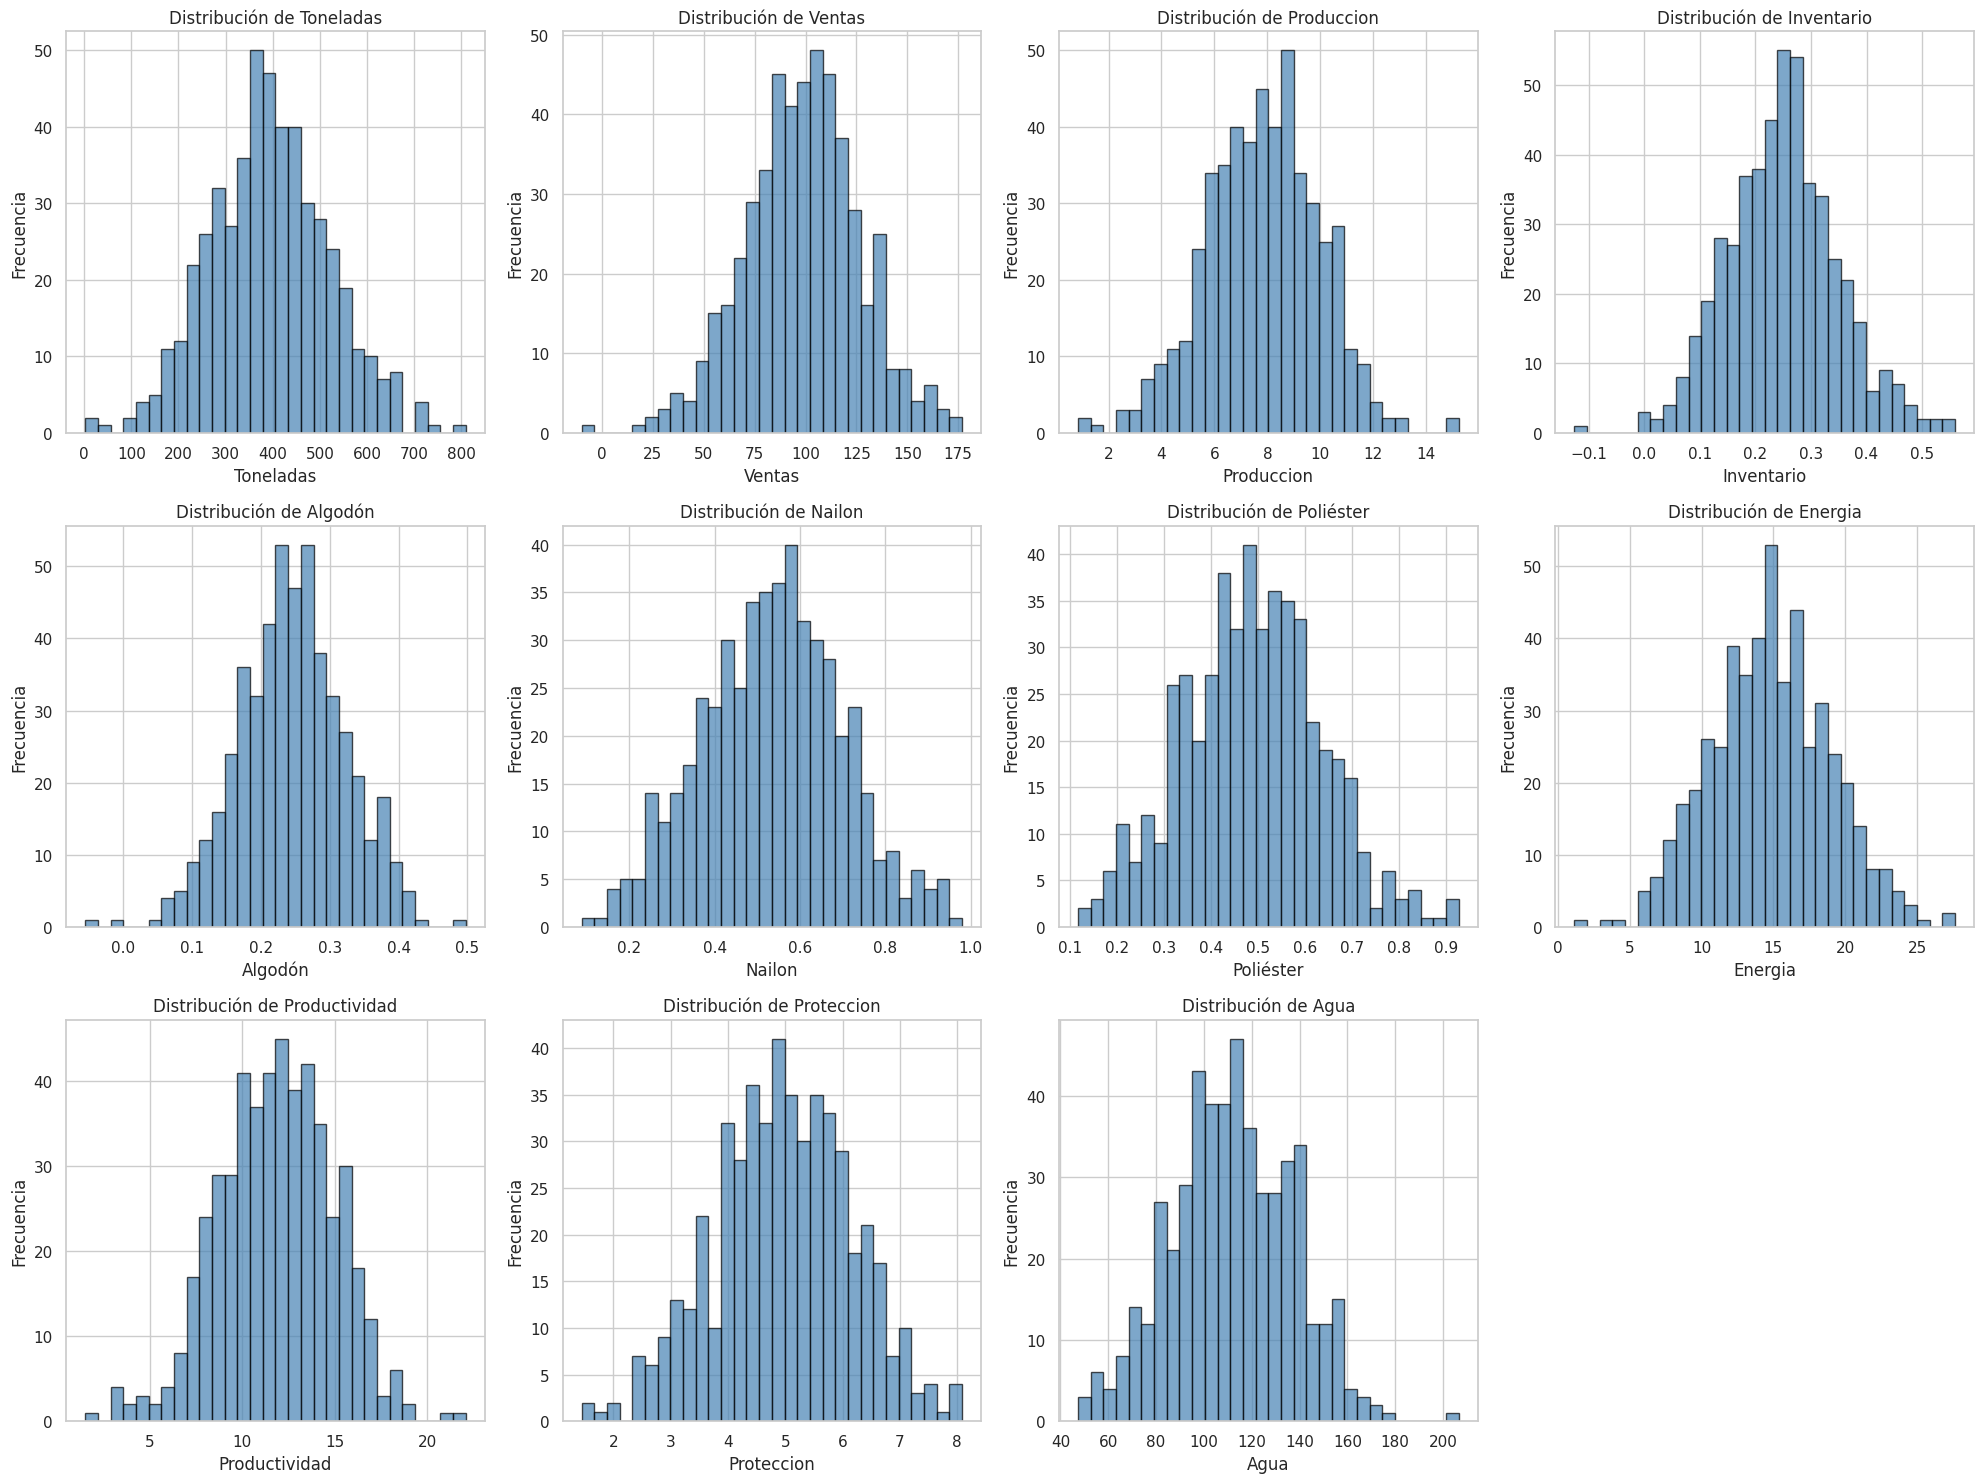

In [9]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col); axes[i].set_ylabel('Frecuencia')
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout(); plt.show()

### Boxplots de todas las variables numéricas

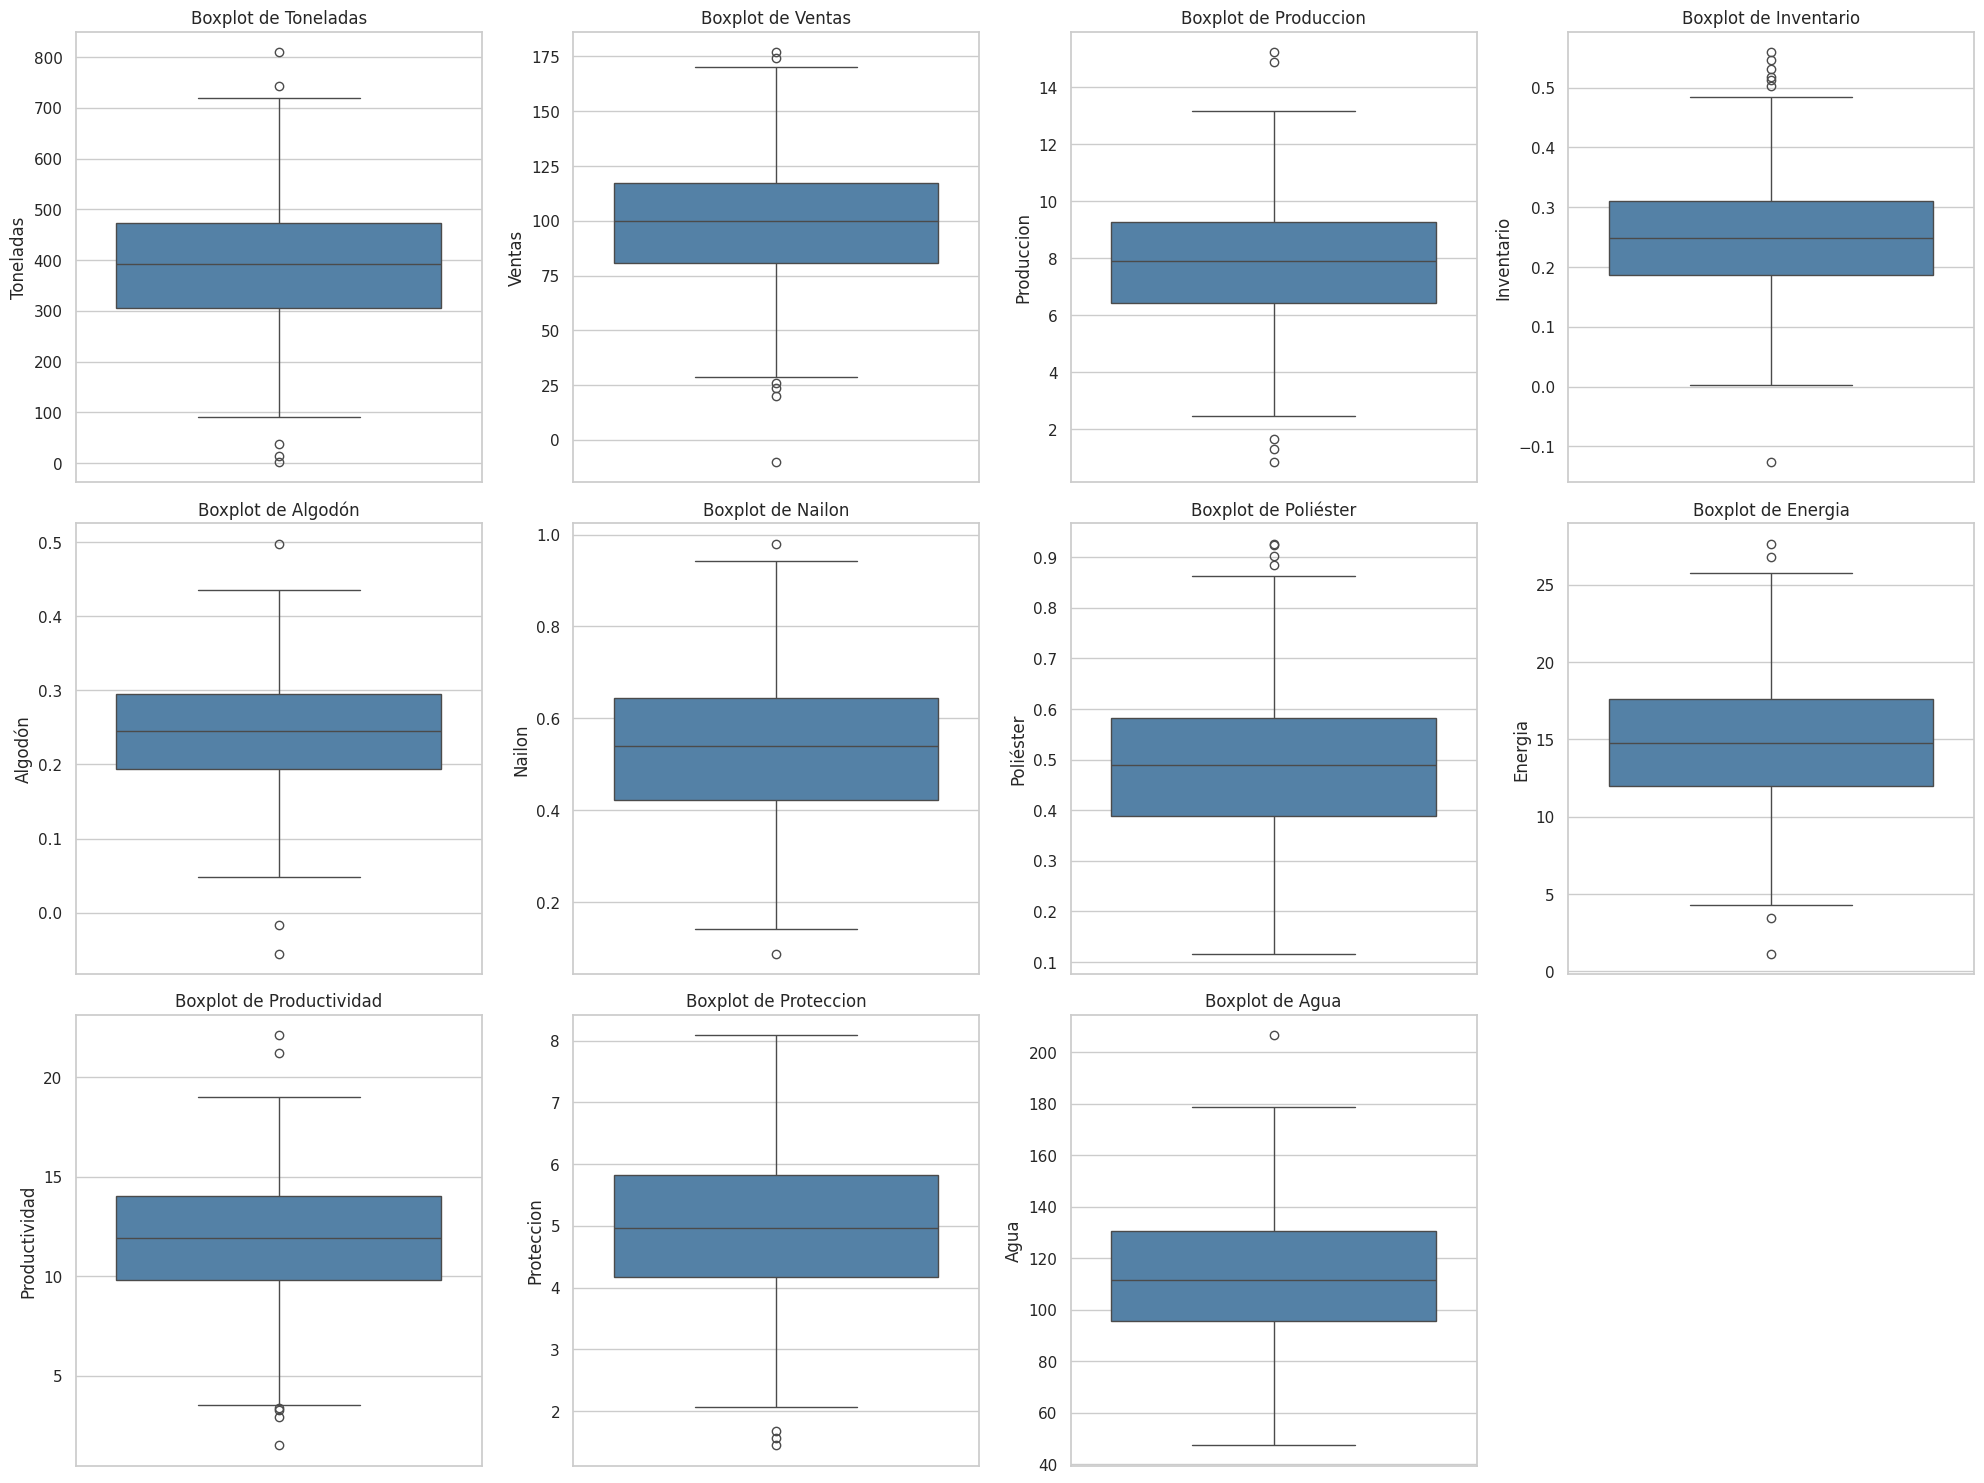

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='steelblue')
    axes[i].set_title(f'Boxplot de {col}')
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout(); plt.show()

### Análisis por variables categóricas

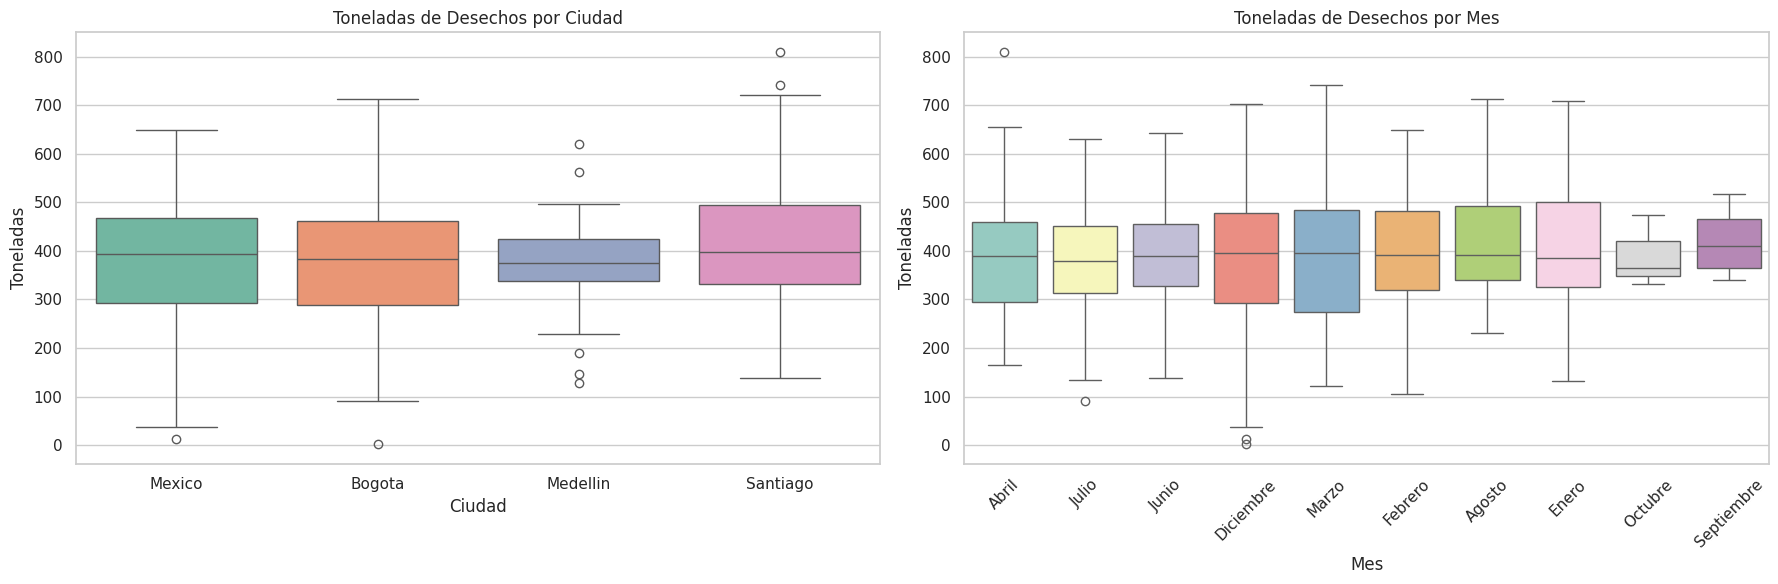

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='Ciudad', y='Toneladas', ax=axes[0], palette='Set2')
axes[0].set_title('Toneladas de Desechos por Ciudad')

sns.boxplot(data=df, x='Mes', y='Toneladas', ax=axes[1], palette='Set3')
axes[1].set_title('Toneladas de Desechos por Mes')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout(); plt.show()

In [12]:
# Promedio de desechos por ciudad y mes
print('Promedio de Toneladas por Ciudad:')
print(df.groupby('Ciudad')['Toneladas'].agg(['mean','std','count']).round(2))
print('\nPromedio de Toneladas por Mes:')
print(df.groupby('Mes')['Toneladas'].agg(['mean','std','count']).round(2))

Promedio de Toneladas por Ciudad:
            mean     std  count
Ciudad                         
Bogota    382.20  130.91    131
Medellin  373.53   99.18     44
Mexico    378.12  124.68    125
Santiago  414.81  126.88    200

Promedio de Toneladas por Mes:
              mean     std  count
Mes                              
Abril       392.19  116.43    113
Agosto      424.13  131.23     16
Diciembre   382.35  142.79     69
Enero       406.07  129.55     38
Febrero     402.28  120.56     79
Julio       371.24  113.76     29
Junio       390.74  115.69     64
Marzo       393.07  143.52     85
Octubre     390.19   74.21      3
Septiembre  419.47   78.92      4


### Matriz de correlación (variables continuas)

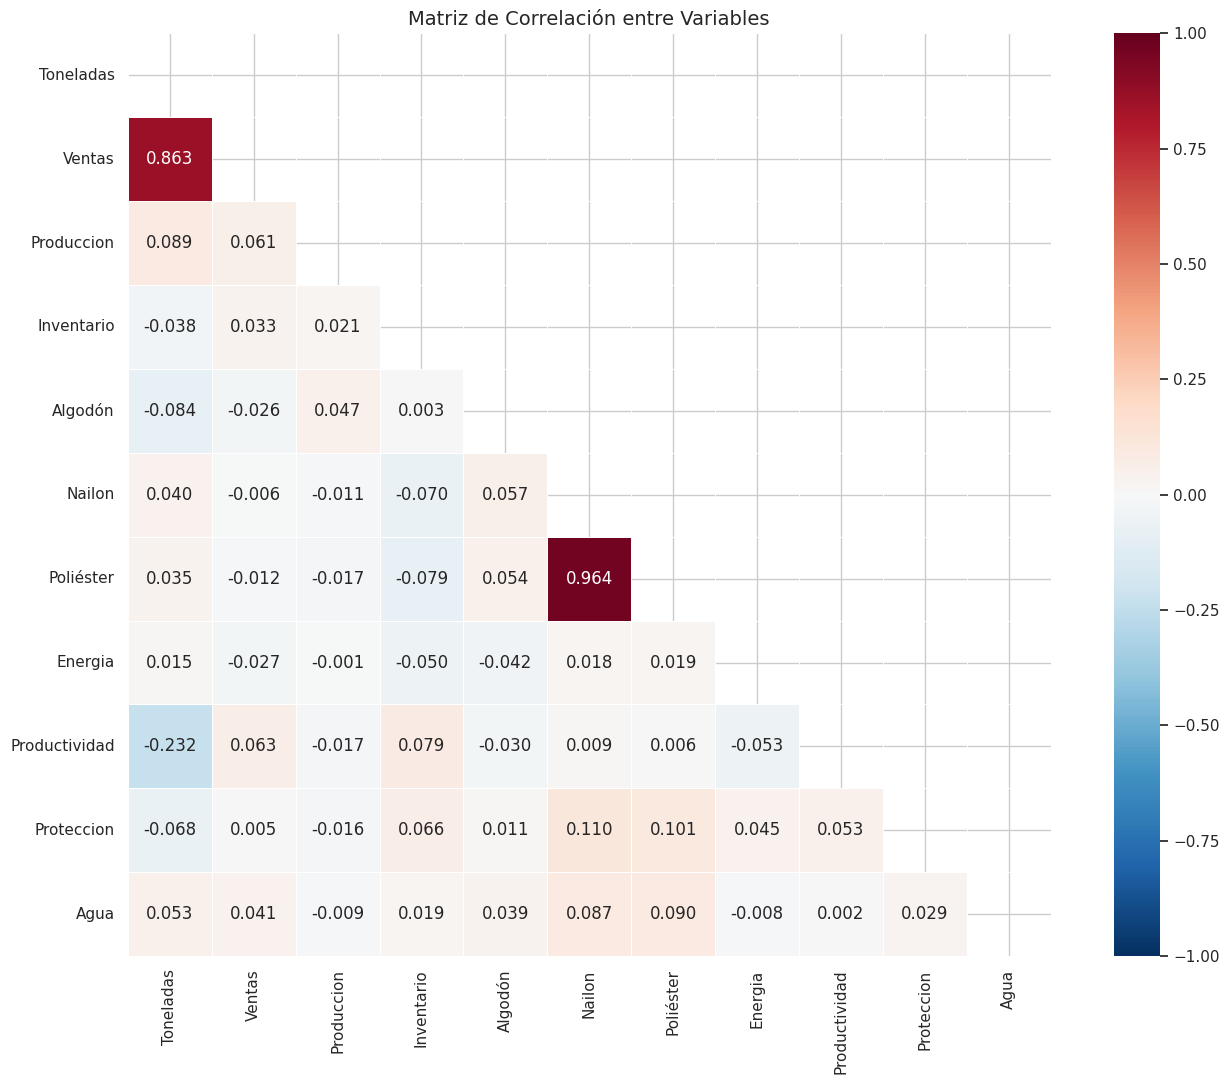

In [13]:
corr = num_df.corr()
fig, ax = plt.subplots(figsize=(14, 11))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax, vmin=-1, vmax=1)
ax.set_title('Matriz de Correlación entre Variables', fontsize=14)
plt.tight_layout(); plt.show()

In [14]:
print('Correlación con Toneladas (variable dependiente):')
print(corr['Toneladas'].drop('Toneladas').sort_values(ascending=False).round(4))

Correlación con Toneladas (variable dependiente):
Ventas           0.8629
Produccion       0.0890
Agua             0.0528
Nailon           0.0395
Poliéster        0.0351
Energia          0.0153
Inventario      -0.0376
Proteccion      -0.0685
Algodón         -0.0835
Productividad   -0.2321
Name: Toneladas, dtype: float64


### Gráficos de dispersión: Variables continuas vs Toneladas

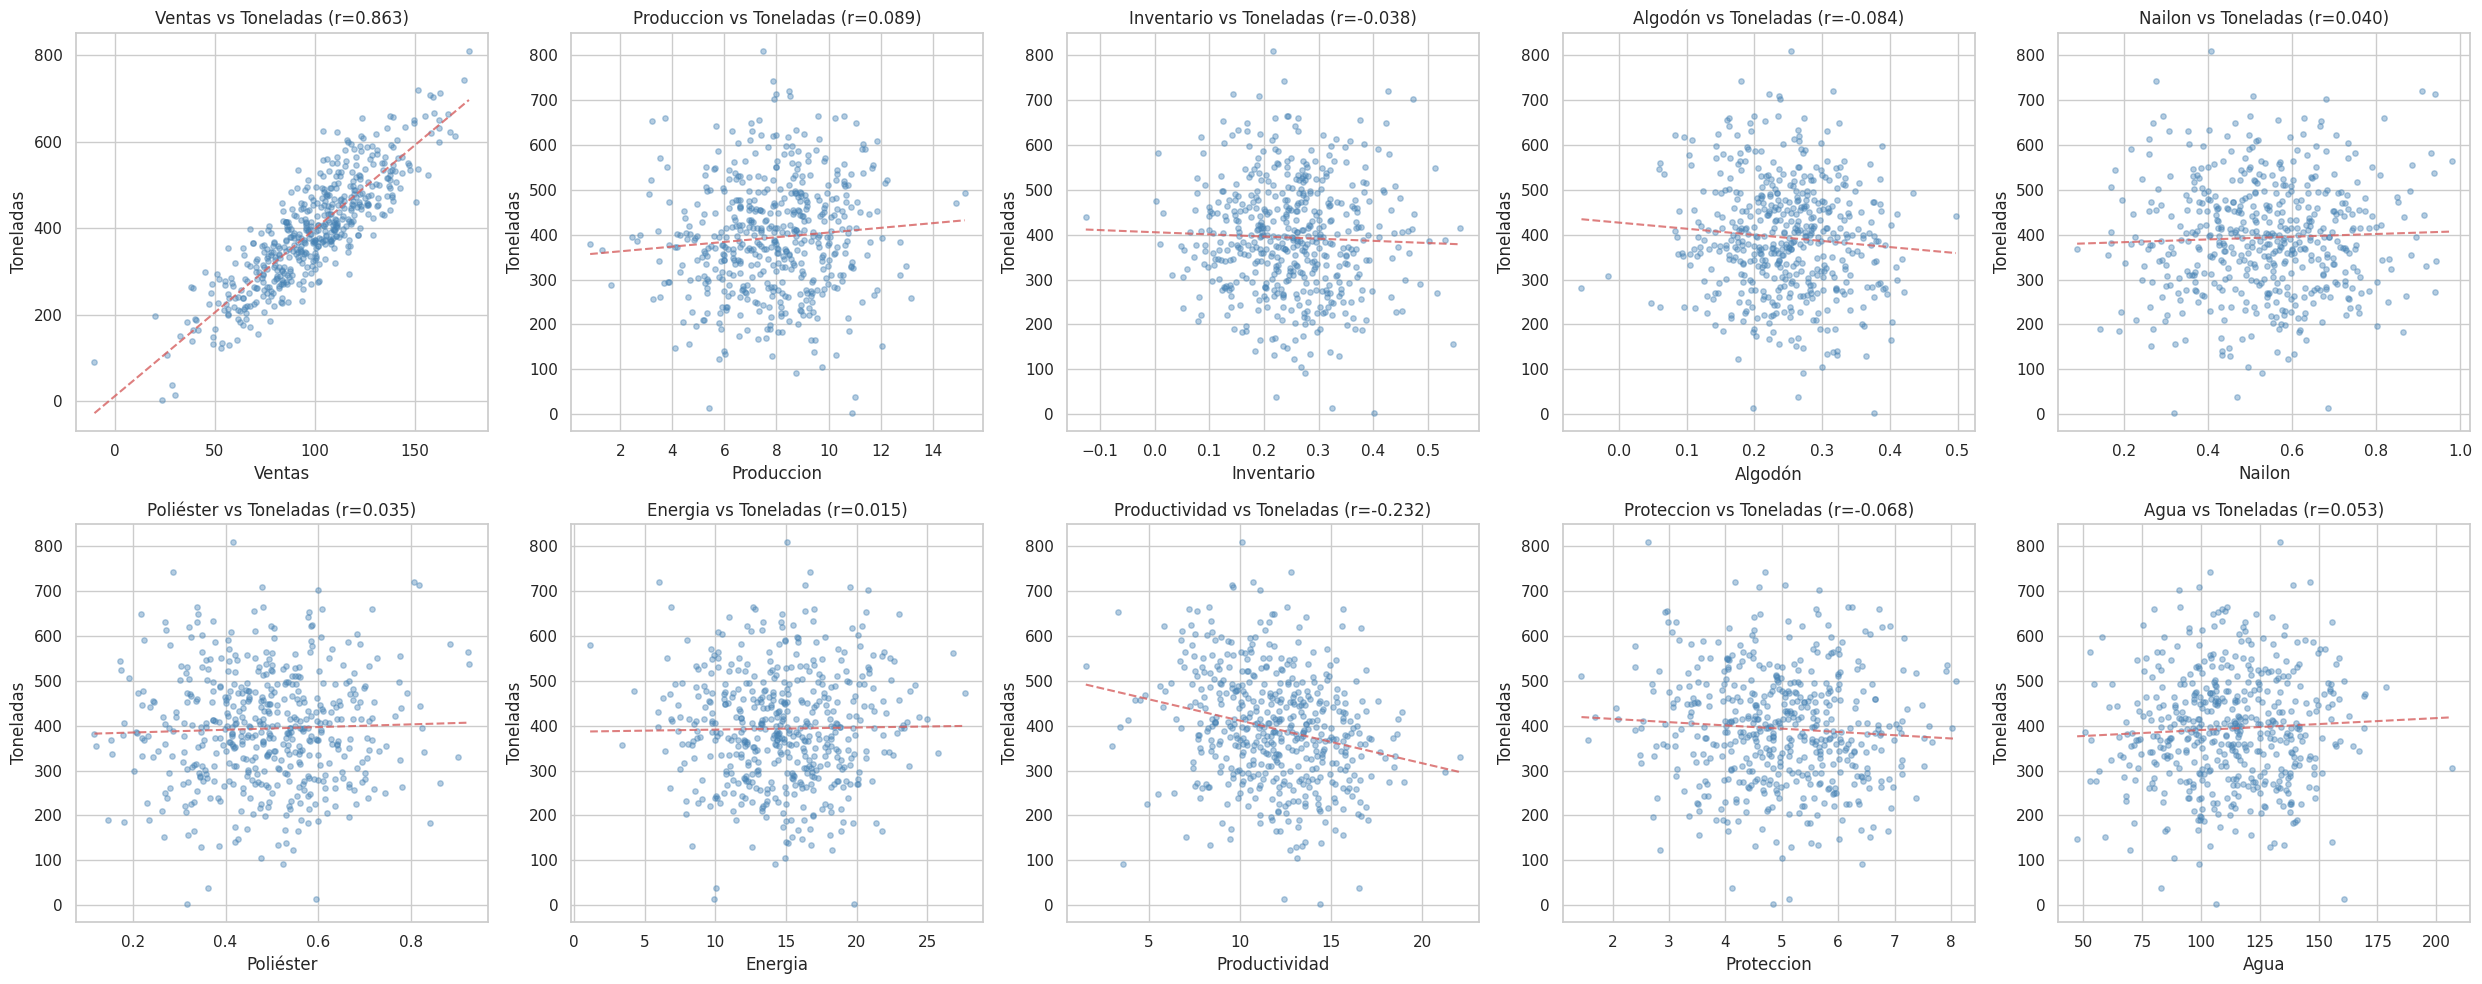

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()
for i, col in enumerate(indep_num):
    axes[i].scatter(df[col], df['Toneladas'], alpha=0.4, s=15, color='steelblue')
    z = np.polyfit(df[col], df['Toneladas'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[col].min(), df[col].max(), 100)
    axes[i].plot(x_line, p(x_line), 'r--', alpha=0.8)
    r = df[col].corr(df['Toneladas'])
    axes[i].set_title(f'{col} vs Toneladas (r={r:.3f})')
    axes[i].set_xlabel(col); axes[i].set_ylabel('Toneladas')
plt.tight_layout(); plt.show()

### Conclusiones del Análisis Descriptivo

- **Toneladas** (variable dependiente): distribución aproximadamente normal con media ~393 toneladas. No se observan valores atípicos extremos.
- **Ventas** presenta la correlación más alta con Toneladas (positiva): a mayores ventas, mayor producción y más desechos.
- **Agua** muestra correlación positiva relevante: procesos con mayor consumo de agua generan más desechos.
- **Inventario** tiene correlación positiva moderada: mayor porcentaje destinado a inventario se asocia con más desechos.
- **Poliéster** muestra correlación positiva: el uso de fibras de poliéster se asocia con mayor generación de desechos.
- **Algodón** presenta correlación negativa: el uso de algodón orgánico se asocia con menor generación de desechos.
- **Ciudad**: se observan diferencias en los niveles de desechos entre ciudades, lo cual justifica incluir esta variable categórica en el modelo.
- **Mes**: no se observan diferencias marcadas entre meses, pero se incluirá para verificar estacionalidad.
- No hay valores nulos en el dataset.

## Punto 2: Estimación Matricial del Modelo de Regresión Lineal Múltiple (20/100)

El modelo de regresión lineal múltiple es: $Y = X\beta + \varepsilon$

Los coeficientes se estiman por MCO: $\hat{\beta} = (X^TX)^{-1}X^TY$

**Nota:** Para la estimación matricial se consideran únicamente las variables continuas (Punto 2-4). Las categóricas se incorporan en el Punto 5.

In [16]:
# Variables continuas solamente
y = df['Toneladas'].values.reshape(-1, 1)
X_cont = df[indep_num]
var_names = ['Intercepto'] + indep_num

# Agregar columna de 1s para el intercepto
X = np.column_stack([np.ones(len(df)), X_cont.values])

print(f'Dimensiones de X: {X.shape}')
print(f'Dimensiones de Y: {y.shape}')
print(f'Variables: {var_names}')

Dimensiones de X: (500, 11)
Dimensiones de Y: (500, 1)
Variables: ['Intercepto', 'Ventas', 'Produccion', 'Inventario', 'Algodón', 'Nailon', 'Poliéster', 'Energia', 'Productividad', 'Proteccion', 'Agua']


In [17]:
# X'X
XtX = X.T @ X
print("Matriz X'X:")
print(pd.DataFrame(XtX, index=var_names, columns=var_names).round(2))

Matriz X'X:
               Intercepto      Ventas  Produccion  Inventario   Algodón  \
Intercepto         500.00    49373.24     3921.26      124.66    122.60   
Ventas           49373.24  5269786.80   389043.18    12355.60  12078.15   
Produccion        3921.26   389043.18    33050.43      979.88    965.45   
Inventario         124.66    12355.60      979.88       35.94     30.58   
Algodón            122.60    12078.15      965.45       30.58     33.04   
Nailon             267.45    26394.93     2095.52       66.11     65.94   
Poliéster          243.57    24028.02     1907.62       60.15     60.03   
Energia           7398.29   728986.03    58015.72     1834.26   1807.44   
Productividad     5932.69   588575.94    46470.60     1491.07   1451.22   
Proteccion        2489.58   245927.61    19504.08      624.56    610.98   
Agua             55966.69  5540928.15   438687.29    13976.68  13760.79   

                 Nailon  Poliéster    Energia  Productividad  Proteccion  \
Intercepto 

In [18]:
# Inversa de X'X
XtX_inv = np.linalg.inv(XtX)
print("Matriz (X'X)^(-1):")
print(pd.DataFrame(XtX_inv, index=var_names, columns=var_names).round(8))

Matriz (X'X)^(-1):
               Intercepto        Ventas    Produccion  Inventario   Algodón  \
Intercepto       0.215736 -2.167900e-04 -3.252240e-03   -0.044243 -0.078698   
Ventas          -0.000217  2.570000e-06 -2.110000e-06   -0.000017  0.000028   
Produccion      -0.003252 -2.110000e-06  4.386400e-04   -0.000195 -0.000606   
Inventario      -0.044243 -1.742000e-05 -1.954500e-04    0.210324 -0.001403   
Algodón         -0.078698  2.804000e-05 -6.058800e-04   -0.001403  0.339747   
Nailon           0.013131 -2.702000e-05 -3.691200e-04   -0.010208 -0.011533   
Poliéster       -0.050453  3.470000e-05  4.901000e-04    0.023542  0.003269   
Energia         -0.001901  4.100000e-07 -7.800000e-07    0.000236  0.000286   
Productividad   -0.002368 -1.410000e-06  6.200000e-06   -0.000482  0.000262   
Proteccion      -0.005584 -1.300000e-07  1.305000e-05   -0.001252 -0.000187   
Agua            -0.000312 -1.200000e-07  4.400000e-07   -0.000019 -0.000037   

                 Nailon  Poliést

In [19]:
# X'Y
XtY = X.T @ y
print("Vector X'Y:")
for name, val in zip(var_names, XtY.flatten()):
    print(f'  {name}: {val:.4f}')

Vector X'Y:
  Intercepto: 196729.7566
  Ventas: 20953034.8359
  Produccion: 1554872.8086
  Inventario: 48814.4183
  Algodón: 47833.7420
  Nailon: 105638.4740
  Poliéster: 96158.8945
  Energia: 2914910.3105
  Productividad: 2289235.0643
  Proteccion: 974427.1194
  Agua: 22103963.1048


In [20]:
# Coeficientes: beta = (X'X)^(-1) * X'Y
beta = XtX_inv @ XtY
print('COEFICIENTES ESTIMADOS (β)')
print('='*50)
for name, val in zip(var_names, beta.flatten()):
    print(f'  {name:20s}: {val:.6f}')

COEFICIENTES ESTIMADOS (β)
  Intercepto          : 156.437094
  Ventas              : 3.941453
  Produccion          : 2.037893
  Inventario          : -46.588817
  Algodón             : -118.434484
  Nailon              : 38.438312
  Poliéster           : 3.802087
  Energia             : 0.645713
  Productividad       : -11.558889
  Proteccion          : -6.563019
  Agua                : 0.092502


### Sumas de Cuadrados y Prueba de Significancia Global

In [21]:
# Valores ajustados y sumas de cuadrados
y_hat = X @ beta
n = len(y)
k = X.shape[1] - 1  # variables independientes (sin intercepto)
y_mean = y.mean()

SSR = float(((y_hat - y_mean).T @ (y_hat - y_mean)).item())
SSE = float(((y - y_hat).T @ (y - y_hat)).item())
SST = float(((y - y_mean).T @ (y - y_mean)).item())

print('SUMAS DE CUADRADOS')
print('='*50)
print(f'  SSR (Regresión): {SSR:,.4f}')
print(f'  SSE (Error):     {SSE:,.4f}')
print(f'  SST (Total):     {SST:,.4f}')
print(f'  SSR + SSE:       {SSR + SSE:,.4f}')
print(f'  Verificación SST ≈ SSR + SSE: {np.isclose(SST, SSR + SSE)}')

SUMAS DE CUADRADOS
  SSR (Regresión): 6,682,165.7160
  SSE (Error):     1,254,520.1225
  SST (Total):     7,936,685.8385
  SSR + SSE:       7,936,685.8385
  Verificación SST ≈ SSR + SSE: True


In [22]:
# R² y R² ajustado
R2 = SSR / SST
R2_adj = 1 - (SSE / (n - k - 1)) / (SST / (n - 1))
print(f'R² = {R2:.6f}')
print(f'R² ajustado = {R2_adj:.6f}')
print(f'El modelo explica el {R2*100:.2f}% de la variabilidad de los desechos textiles.')

R² = 0.841934
R² ajustado = 0.838702
El modelo explica el 84.19% de la variabilidad de los desechos textiles.


In [23]:
# Prueba F de significancia global
MSR = SSR / k
MSE = SSE / (n - k - 1)
F_stat = MSR / MSE
p_value_F = 1 - sp_stats.f.cdf(F_stat, k, n - k - 1)
F_crit = sp_stats.f.ppf(0.95, k, n - k - 1)

print('PRUEBA DE SIGNIFICANCIA GLOBAL (Prueba F)')
print('='*60)
print(f'  H0: β1 = β2 = ... = β{k} = 0')
print(f'  H1: al menos un βi ≠ 0')
print(f'\n  MSR = {MSR:,.4f}')
print(f'  MSE = {MSE:,.4f}')
print(f'  F estadístico = {F_stat:.4f}')
print(f'  GL: ({k}, {n - k - 1})')
print(f'  p-valor = {p_value_F:.2e}')
print(f'  F crítico (α=0.05): {F_crit:.4f}')
if p_value_F < 0.05:
    print(f'\n  CONCLUSIÓN: Se rechaza H0 (p < 0.05). El modelo es globalmente significativo.')
else:
    print(f'\n  CONCLUSIÓN: No se rechaza H0. El modelo no es significativo.')

PRUEBA DE SIGNIFICANCIA GLOBAL (Prueba F)
  H0: β1 = β2 = ... = β10 = 0
  H1: al menos un βi ≠ 0

  MSR = 668,216.5716
  MSE = 2,565.4808
  F estadístico = 260.4645
  GL: (10, 489)
  p-valor = 0.00e+00
  F crítico (α=0.05): 1.8501

  CONCLUSIÓN: Se rechaza H0 (p < 0.05). El modelo es globalmente significativo.


In [24]:
# Tabla ANOVA
anova_df = pd.DataFrame({
    'Fuente': ['Regresión', 'Error', 'Total'],
    'GL': [k, n - k - 1, n - 1],
    'SS': [SSR, SSE, SST],
    'MS': [MSR, MSE, np.nan],
    'F': [F_stat, np.nan, np.nan],
    'p-valor': [p_value_F, np.nan, np.nan]
})
print('TABLA ANOVA')
print('='*80)
print(anova_df.to_string(index=False))

TABLA ANOVA
   Fuente  GL           SS            MS          F  p-valor
Regresión  10 6.682166e+06 668216.571604 260.464458      0.0
    Error 489 1.254520e+06   2565.480823        NaN      NaN
    Total 499 7.936686e+06           NaN        NaN      NaN


### Significancia individual de cada coeficiente

In [25]:
# Errores estándar, t-stats, p-valores
var_beta = MSE * XtX_inv
se_beta = np.sqrt(np.diag(var_beta))
t_stats = beta.flatten() / se_beta
p_values = 2 * (1 - sp_stats.t.cdf(np.abs(t_stats), n - k - 1))

coef_df = pd.DataFrame({
    'Variable': var_names,
    'Coeficiente': beta.flatten(),
    'Error Estándar': se_beta,
    't-estadístico': t_stats,
    'p-valor': p_values,
    'Significativo': ['Sí' if p < 0.05 else 'No' for p in p_values]
})
print('COEFICIENTES DEL MODELO')
print('='*90)
print(coef_df.to_string(index=False))

COEFICIENTES DEL MODELO
     Variable  Coeficiente  Error Estándar  t-estadístico      p-valor Significativo
   Intercepto   156.437094       23.525876       6.649576 7.878720e-11            Sí
       Ventas     3.941453        0.081147      48.571630 0.000000e+00            Sí
   Produccion     2.037893        1.060807       1.921079 5.530279e-02            No
   Inventario   -46.588817       23.228889      -2.005641 4.544495e-02            Sí
      Algodón  -118.434484       29.523120      -4.011584 6.975301e-05            Sí
       Nailon    38.438312       52.203797       0.736313 4.618936e-01            No
    Poliéster     3.802087       58.635208       0.064843 9.483255e-01            No
      Energia     0.645713        0.550852       1.172208 2.416845e-01            No
Productividad   -11.558889        0.741368     -15.591291 0.000000e+00            Sí
   Proteccion    -6.563019        1.929759      -3.400953 7.265184e-04            Sí
         Agua     0.092502        0.09101

## Punto 3: Verificación del Modelo con statsmodels (5/100)
### Equivalente a correr el modelo en R-Studio con variables continuas

In [26]:
import statsmodels.api as sm

X_sm = sm.add_constant(df[indep_num])
model = sm.OLS(df['Toneladas'], X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Toneladas   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     260.5
Date:                Wed, 25 Feb 2026   Prob (F-statistic):          1.02e-188
Time:                        17:07:55   Log-Likelihood:                -2666.4
No. Observations:                 500   AIC:                             5355.
Df Residuals:                     489   BIC:                             5401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           156.4371     23.526      6.650

In [27]:
# Verificar coincidencia con cálculo matricial
print('Verificación de coeficientes:')
print(f'{"Variable":20s} {"Matricial":>15s} {"statsmodels":>15s} {"Diferencia":>12s}')
print('='*65)
for name, b_mat, b_sm in zip(var_names, beta.flatten(), model.params.values):
    print(f'{name:20s} {b_mat:15.6f} {b_sm:15.6f} {abs(b_mat-b_sm):12.2e}')

Verificación de coeficientes:
Variable                   Matricial     statsmodels   Diferencia
Intercepto                156.437094      156.437094     7.67e-12
Ventas                      3.941453        3.941453     2.22e-14
Produccion                  2.037893        2.037893     3.10e-13
Inventario                -46.588817      -46.588817     4.51e-11
Algodón                  -118.434484     -118.434484     9.62e-11
Nailon                     38.438312       38.438312     3.39e-11
Poliéster                   3.802087        3.802087     5.31e-11
Energia                     0.645713        0.645713     7.11e-14
Productividad             -11.558889      -11.558889     2.06e-13
Proteccion                 -6.563019       -6.563019     6.18e-13
Agua                        0.092502        0.092502     3.28e-14


## Punto 4: Verificación de Supuestos del Modelo (10/100)

### 4.1 Normalidad de los residuales

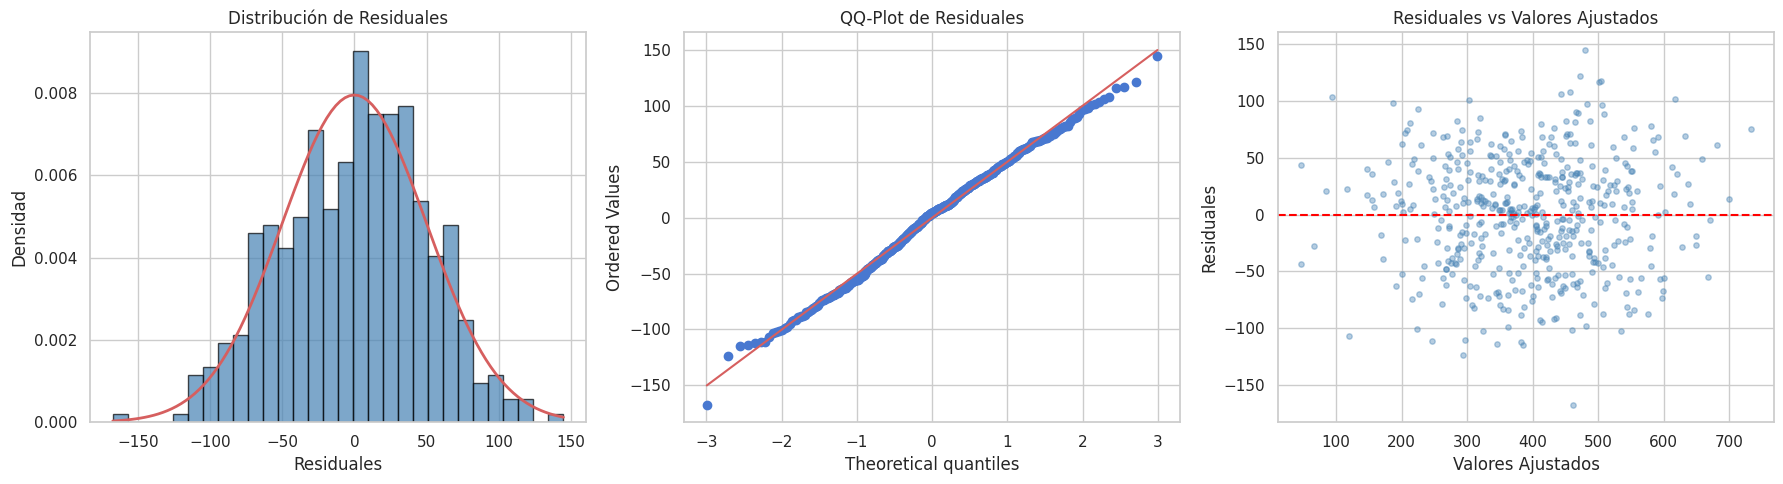

In [28]:
residuals = model.resid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue', density=True)
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
axes[0].plot(x_norm, sp_stats.norm.pdf(x_norm, residuals.mean(), residuals.std()), 'r-', lw=2)
axes[0].set_title('Distribución de Residuales')
axes[0].set_xlabel('Residuales'); axes[0].set_ylabel('Densidad')

# QQ-plot
sp_stats.probplot(residuals, dist='norm', plot=axes[1])
axes[1].set_title('QQ-Plot de Residuales')

# Residuales vs ajustados
axes[2].scatter(model.fittedvalues, residuals, alpha=0.4, s=15, color='steelblue')
axes[2].axhline(y=0, color='red', linestyle='--')
axes[2].set_title('Residuales vs Valores Ajustados')
axes[2].set_xlabel('Valores Ajustados'); axes[2].set_ylabel('Residuales')
plt.tight_layout(); plt.show()

In [29]:
# Shapiro-Wilk
stat_sw, p_sw = sp_stats.shapiro(residuals)
print('TEST DE NORMALIDAD - Shapiro-Wilk')
print(f'  W = {stat_sw:.6f}, p-valor = {p_sw:.6f}')
print(f'  {"No se rechaza H0: residuales normales" if p_sw > 0.05 else "Se rechaza H0: residuales NO normales"} (α=0.05)')

# Jarque-Bera
jb_stat, jb_p = sp_stats.jarque_bera(residuals)
print(f'\nTEST DE NORMALIDAD - Jarque-Bera')
print(f'  JB = {jb_stat:.6f}, p-valor = {jb_p:.6f}')
print(f'  {"No se rechaza H0: residuales normales" if jb_p > 0.05 else "Se rechaza H0: residuales NO normales"} (α=0.05)')

TEST DE NORMALIDAD - Shapiro-Wilk
  W = 0.995531, p-valor = 0.163580
  No se rechaza H0: residuales normales (α=0.05)

TEST DE NORMALIDAD - Jarque-Bera
  JB = 3.577701, p-valor = 0.167152
  No se rechaza H0: residuales normales (α=0.05)


### 4.2 Homocedasticidad

In [30]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_p, bp_f, bp_fp = het_breuschpagan(residuals, model.model.exog)
print('TEST DE HOMOCEDASTICIDAD - Breusch-Pagan')
print(f'  H0: Varianza constante (homocedasticidad)')
print(f'  H1: Varianza NO constante (heterocedasticidad)')
print(f'  LM = {bp_stat:.6f}, p-valor = {bp_p:.6f}')
print(f'  {"No se rechaza H0: homocedasticidad" if bp_p > 0.05 else "Se rechaza H0: heterocedasticidad"} (α=0.05)')

TEST DE HOMOCEDASTICIDAD - Breusch-Pagan
  H0: Varianza constante (homocedasticidad)
  H1: Varianza NO constante (heterocedasticidad)
  LM = 12.409828, p-valor = 0.258564
  No se rechaza H0: homocedasticidad (α=0.05)


### 4.3 No autocorrelación

In [31]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print('TEST DE AUTOCORRELACIÓN - Durbin-Watson')
print(f'  DW = {dw:.6f} (valores cercanos a 2 = no autocorrelación)')
print(f'  {"No hay evidencia de autocorrelación" if 1.5 < dw < 2.5 else "Posible autocorrelación"}')

TEST DE AUTOCORRELACIÓN - Durbin-Watson
  DW = 1.982756 (valores cercanos a 2 = no autocorrelación)
  No hay evidencia de autocorrelación


### 4.4 No multicolinealidad (VIF)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[indep_num]
vif_data = pd.DataFrame({
    'Variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data['Problema'] = vif_data['VIF'].apply(lambda x: 'Severo (>10)' if x > 10 else ('Moderado (5-10)' if x > 5 else 'No'))
print('FACTOR DE INFLACIÓN DE LA VARIANZA (VIF)')
print('='*50)
print(vif_data.to_string(index=False))
print('\nVIF > 10 = multicolinealidad severa; VIF > 5 = moderada')

FACTOR DE INFLACIÓN DE LA VARIANZA (VIF)
     Variable        VIF        Problema
       Ventas  12.378091    Severo (>10)
   Produccion  12.876693    Severo (>10)
   Inventario   7.233087 Moderado (5-10)
      Algodón  10.276147    Severo (>10)
       Nailon 166.178292    Severo (>10)
    Poliéster 171.825344    Severo (>10)
      Energia  11.981104    Severo (>10)
Productividad  14.144354    Severo (>10)
   Proteccion  17.123825    Severo (>10)
         Agua  18.271654    Severo (>10)

VIF > 10 = multicolinealidad severa; VIF > 5 = moderada


### 4.5 Gráficos de residuales vs cada variable

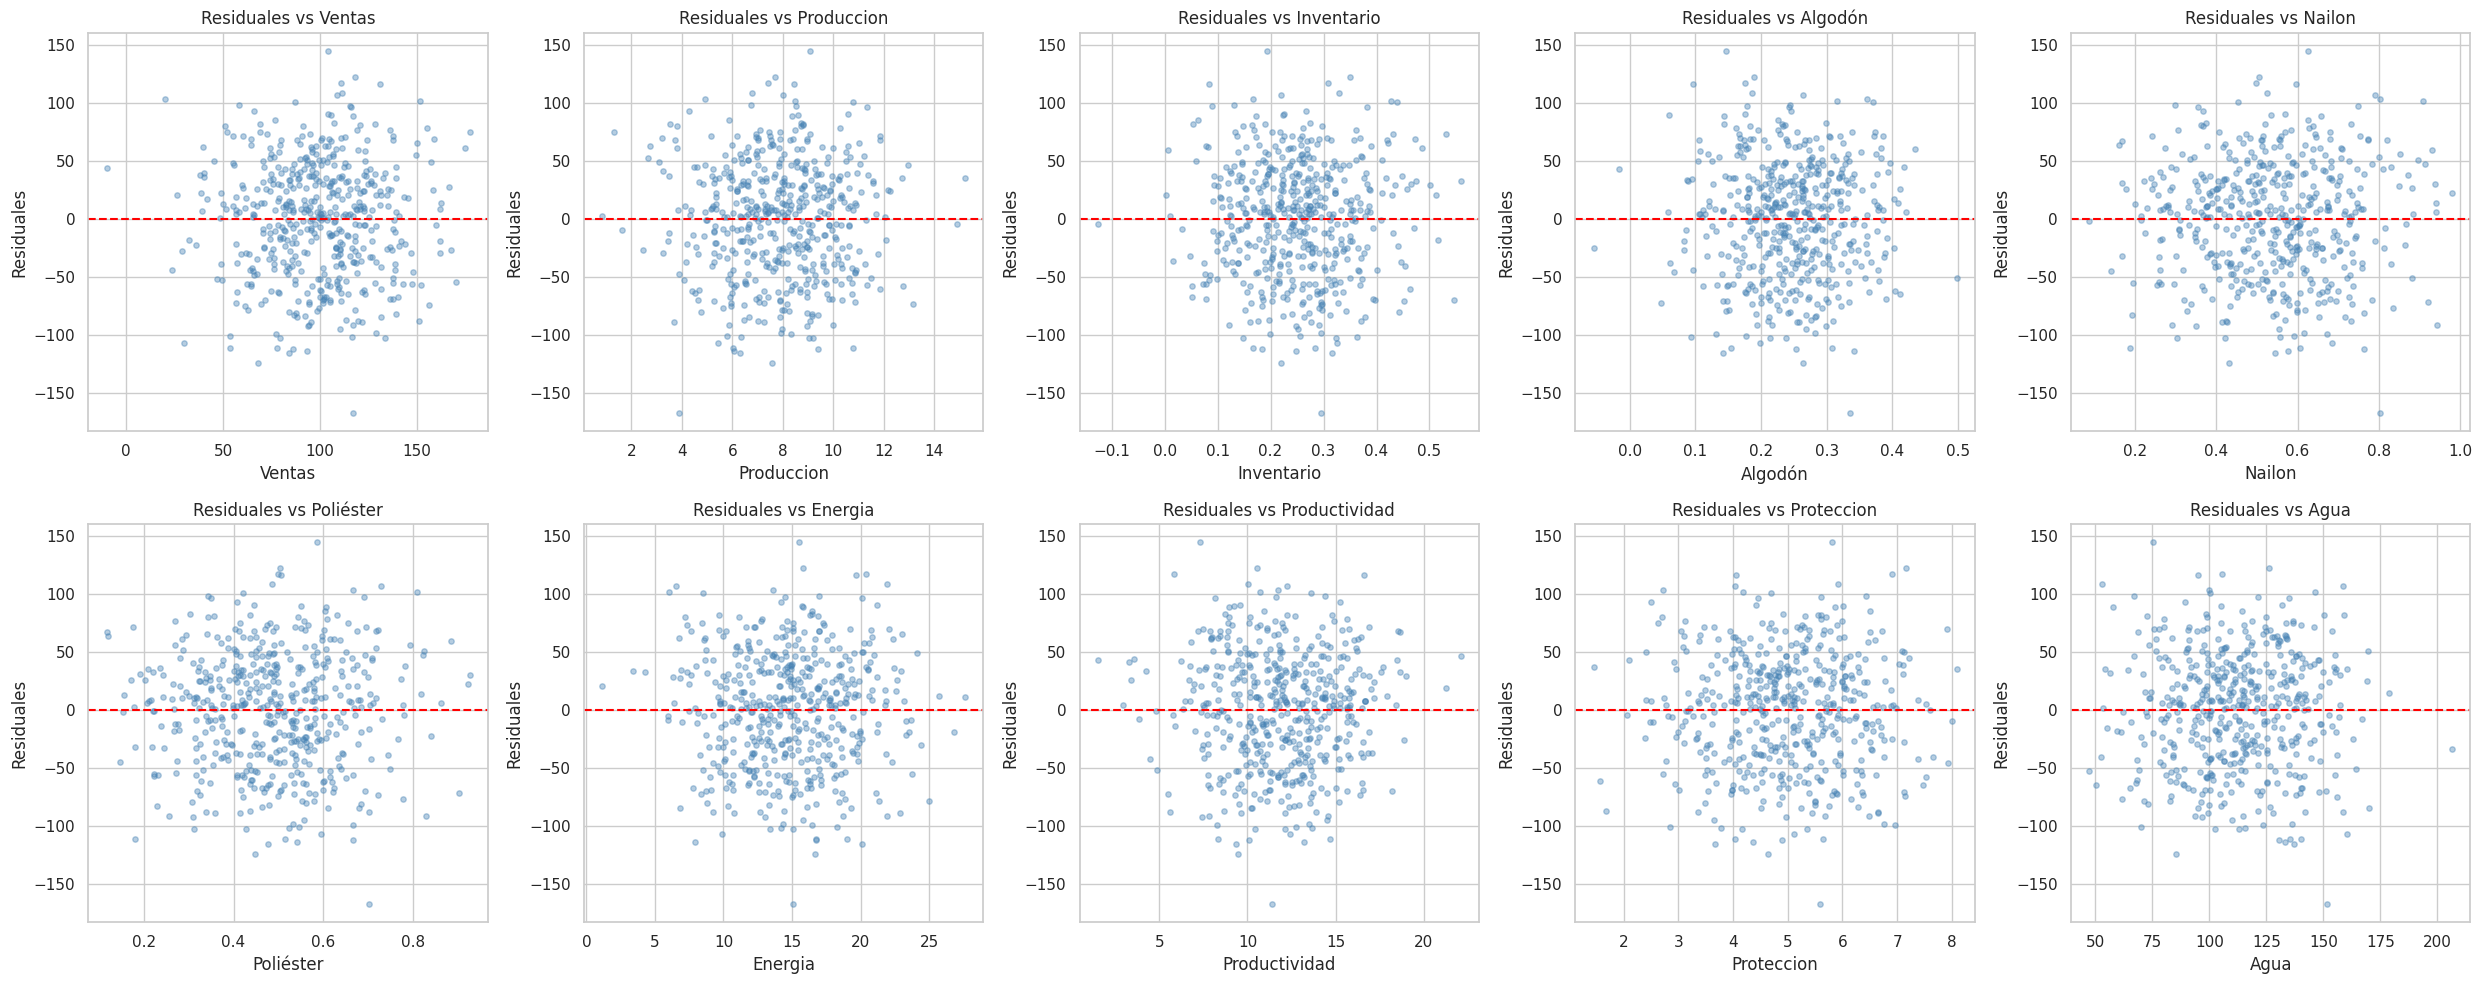

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()
for i, col in enumerate(indep_num):
    axes[i].scatter(df[col], residuals, alpha=0.4, s=15, color='steelblue')
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_title(f'Residuales vs {col}')
    axes[i].set_xlabel(col); axes[i].set_ylabel('Residuales')
plt.tight_layout(); plt.show()

### Diagnóstico y Correcciones

Si se detectan problemas en los supuestos:
- **Heterocedasticidad**: se aplican errores estándar robustos (HC3).
- **Multicolinealidad**: se evalúa eliminar variables con VIF alto.
- **No normalidad**: con n=500, por el TLC los estimadores son asintóticamente normales.

In [34]:
# Modelo con errores estándar robustos (HC3)
model_robust = model.get_robustcov_results(cov_type='HC3')
print('MODELO CON ERRORES ESTÁNDAR ROBUSTOS (HC3)')
print(model_robust.summary())

MODELO CON ERRORES ESTÁNDAR ROBUSTOS (HC3)
                            OLS Regression Results                            
Dep. Variable:              Toneladas   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     249.7
Date:                Wed, 25 Feb 2026   Prob (F-statistic):          5.90e-185
Time:                        17:07:56   Log-Likelihood:                -2666.4
No. Observations:                 500   AIC:                             5355.
Df Residuals:                     489   BIC:                             5401.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

## Punto 5: Modelo con Variables Continuas y Categóricas (5/100)
### Incorporación de Ciudad y Mes como variables dummy

In [35]:
# Crear dummies para Ciudad y Mes
df_model = df.copy()
df_dummies = pd.get_dummies(df_model, columns=['Ciudad', 'Mes'], drop_first=True, dtype=float)

# Separar Y y X
y_full = df_dummies['Toneladas']
X_full = df_dummies.drop(columns=['Toneladas'])
X_full_sm = sm.add_constant(X_full)

model_full = sm.OLS(y_full, X_full_sm).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:              Toneladas   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 25 Feb 2026   Prob (F-statistic):          1.34e-189
Time:                        17:07:56   Log-Likelihood:                -2631.5
No. Observations:                 500   AIC:                             5309.
Df Residuals:                     477   BIC:                             5406.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             147.5530     22.890     

In [36]:
# Comparar R² del modelo solo continuas vs completo
print(f'R² modelo solo continuas: {model.rsquared:.6f}')
print(f'R² modelo completo (con categóricas): {model_full.rsquared:.6f}')
print(f'R² ajustado solo continuas: {model.rsquared_adj:.6f}')
print(f'R² ajustado completo: {model_full.rsquared_adj:.6f}')

R² modelo solo continuas: 0.841934
R² modelo completo (con categóricas): 0.862542
R² ajustado solo continuas: 0.838702
R² ajustado completo: 0.856202


## Punto 6: Contrastes de Hipótesis (30/100)

### 6a. ¿El efecto de la productividad energética es mayor al de la protección?

$$H_0: \beta_{Productividad} - \beta_{Proteccion} = 0$$
$$H_1: \beta_{Productividad} - \beta_{Proteccion} > 0$$

Se usa el modelo completo (con categóricas) para los contrastes.

In [37]:
# Usar el modelo completo para contrastes
beta_full = model_full.params.values.reshape(-1, 1)
var_names_full = model_full.params.index.tolist()
n_full = len(y_full)
k_full = len(var_names_full) - 1
MSE_full = model_full.mse_resid
vcov_full = np.array(model_full.cov_params())

print('Variables en el modelo completo:')
for i, name in enumerate(var_names_full):
    print(f'  [{i}] {name}: β = {beta_full[i,0]:.6f}')

Variables en el modelo completo:
  [0] const: β = 147.552964
  [1] Ventas: β = 3.932775
  [2] Produccion: β = 2.580948
  [3] Inventario: β = -22.925532
  [4] Algodón: β = -108.427449
  [5] Nailon: β = 43.294429
  [6] Poliéster: β = 2.333614
  [7] Energia: β = 0.464061
  [8] Productividad: β = -12.085995
  [9] Proteccion: β = -5.788811
  [10] Agua: β = 0.052620
  [11] Ciudad_Medellin: β = -19.619899
  [12] Ciudad_Mexico: β = -11.326020
  [13] Ciudad_Santiago: β = 24.834891
  [14] Mes_Agosto: β = -13.237670
  [15] Mes_Diciembre: β = 1.029802
  [16] Mes_Enero: β = 17.031932
  [17] Mes_Febrero: β = 3.961747
  [18] Mes_Julio: β = -24.097514
  [19] Mes_Junio: β = -2.317669
  [20] Mes_Marzo: β = -1.767843
  [21] Mes_Octubre: β = -10.583575
  [22] Mes_Septiembre: β = -19.810964


In [38]:
# Vector de contraste: Productividad - Proteccion
prod_idx = var_names_full.index('Productividad')
prot_idx = var_names_full.index('Proteccion')

c = np.zeros((len(var_names_full), 1))
c[prod_idx] = 1
c[prot_idx] = -1

estimador = (c.T @ beta_full).item()
var_c = (c.T @ vcov_full @ c).item()
se_c = np.sqrt(var_c)
t_c = estimador / se_c
gl = n_full - k_full - 1
p_val = 1 - sp_stats.t.cdf(t_c, gl)  # unilateral derecha
t_crit = sp_stats.t.ppf(0.95, gl)

print('CONTRASTE 6a: Productividad vs Protección')
print('='*60)
print(f'  H0: β_Productividad - β_Protección = 0')
print(f'  H1: β_Productividad - β_Protección > 0')
print(f'\n  Estimador (c\'β): {estimador:.6f}')
print(f'  Error estándar: {se_c:.6f}')
print(f'  t = {t_c:.4f}')
print(f'  t crítico (α=0.05, gl={gl}): {t_crit:.4f}')
print(f'  p-valor (unilateral): {p_val:.6f}')
if p_val < 0.05:
    print(f'\n  CONCLUSIÓN: Se rechaza H0. El efecto de la productividad energética')
    print(f'  es significativamente mayor al de la protección ambiental.')
    print(f'  Recomendación: enfocar estrategias en eficiencia productiva.')
else:
    print(f'\n  CONCLUSIÓN: No se rechaza H0. No hay evidencia suficiente para afirmar')
    print(f'  que el efecto de la productividad sea mayor al de la protección.')

CONTRASTE 6a: Productividad vs Protección
  H0: β_Productividad - β_Protección = 0
  H1: β_Productividad - β_Protección > 0

  Estimador (c'β): -6.297184
  Error estándar: 2.008593
  t = -3.1351
  t crítico (α=0.05, gl=477): 1.6481
  p-valor (unilateral): 0.999088

  CONCLUSIÓN: No se rechaza H0. No hay evidencia suficiente para afirmar
  que el efecto de la productividad sea mayor al de la protección.


### 6b. ¿Los desechos en Santiago de Chile son mayores que en Bogotá?

$$H_0: \beta_{Santiago} - \beta_{Bogota} \leq 0$$
$$H_1: \beta_{Santiago} - \beta_{Bogota} > 0$$

Nota: Como se usó `drop_first=True`, la ciudad base (referencia) depende del orden alfabético. Las dummies representan la diferencia respecto a la categoría base.

In [39]:
# Identificar las dummies de ciudad
ciudad_vars = [v for v in var_names_full if v.startswith('Ciudad_')]
print('Variables dummy de Ciudad:', ciudad_vars)
print()

# Determinar la categoría base
todas_ciudades = df['Ciudad'].unique().tolist()
ciudades_dummy = [v.replace('Ciudad_', '') for v in ciudad_vars]
ciudad_base = [c for c in todas_ciudades if c not in ciudades_dummy][0]
print(f'Ciudad base (referencia): {ciudad_base}')

# Construir contraste Santiago - Bogota
c2 = np.zeros((len(var_names_full), 1))

# Si Santiago tiene dummy, su coeficiente es β_Santiago (diferencia vs base)
# Si Bogota tiene dummy, su coeficiente es β_Bogota (diferencia vs base)
# Queremos: (β_base + β_Santiago) - (β_base + β_Bogota) = β_Santiago - β_Bogota

santiago_var = [v for v in ciudad_vars if 'Santiago' in v]
bogota_var = [v for v in ciudad_vars if 'Bogota' in v or 'Bogotá' in v]

if santiago_var:
    c2[var_names_full.index(santiago_var[0])] = 1
else:
    # Santiago es la base, así que su efecto es 0
    pass

if bogota_var:
    c2[var_names_full.index(bogota_var[0])] = -1
else:
    # Bogota es la base
    pass

print(f'\nContraste: Santiago - Bogota')
print(f'Vector c (posiciones no cero):')
for i, v in enumerate(var_names_full):
    if c2[i] != 0:
        print(f'  {v}: {c2[i,0]}')

estimador2 = (c2.T @ beta_full).item()
var_c2 = (c2.T @ vcov_full @ c2).item()
se_c2 = np.sqrt(var_c2)
t_c2 = estimador2 / se_c2
p_val2 = 1 - sp_stats.t.cdf(t_c2, gl)  # unilateral derecha

print(f'\nCONTRASTE 6b: Santiago vs Bogotá')
print('='*60)
print(f'  H0: Desechos Santiago ≤ Desechos Bogotá')
print(f'  H1: Desechos Santiago > Desechos Bogotá')
print(f'\n  Estimador: {estimador2:.6f}')
print(f'  Error estándar: {se_c2:.6f}')
print(f'  t = {t_c2:.4f}')
print(f'  p-valor (unilateral): {p_val2:.6f}')
if p_val2 < 0.05:
    print(f'\n  CONCLUSIÓN: Se rechaza H0. Los desechos en Santiago son')
    print(f'  significativamente mayores que en Bogotá.')
else:
    print(f'\n  CONCLUSIÓN: No se rechaza H0. No hay evidencia suficiente para afirmar')
    print(f'  que los desechos en Santiago sean mayores que en Bogotá.')

Variables dummy de Ciudad: ['Ciudad_Medellin', 'Ciudad_Mexico', 'Ciudad_Santiago']

Ciudad base (referencia): Bogota

Contraste: Santiago - Bogota
Vector c (posiciones no cero):
  Ciudad_Santiago: 1.0

CONTRASTE 6b: Santiago vs Bogotá
  H0: Desechos Santiago ≤ Desechos Bogotá
  H1: Desechos Santiago > Desechos Bogotá

  Estimador: 24.834891
  Error estándar: 5.517644
  t = 4.5010
  p-valor (unilateral): 0.000004

  CONCLUSIÓN: Se rechaza H0. Los desechos en Santiago son
  significativamente mayores que en Bogotá.


### 6c. Contrastes adicionales

#### Contraste 1: ¿El efecto del Algodón orgánico es significativamente diferente al del Poliéster?

$$H_0: \beta_{Algodón} - \beta_{Poliéster} = 0$$
$$H_1: \beta_{Algodón} - \beta_{Poliéster} \neq 0$$

Este contraste es relevante porque permite determinar si la elección de materia prima (orgánica vs sintética) tiene un impacto diferenciado sobre los desechos.

In [40]:
# Contraste: Algodón vs Poliéster
alg_idx = var_names_full.index('Algodón')
pol_idx = var_names_full.index('Poliéster')

c3 = np.zeros((len(var_names_full), 1))
c3[alg_idx] = 1
c3[pol_idx] = -1

estimador3 = (c3.T @ beta_full).item()
var_c3 = (c3.T @ vcov_full @ c3).item()
se_c3 = np.sqrt(var_c3)
t_c3 = estimador3 / se_c3
p_val3 = 2 * (1 - sp_stats.t.cdf(abs(t_c3), gl))

print('CONTRASTE 6c-1: Algodón vs Poliéster')
print('='*60)
print(f'  H0: β_Algodón - β_Poliéster = 0')
print(f'  H1: β_Algodón - β_Poliéster ≠ 0')
print(f'\n  Estimador: {estimador3:.6f}')
print(f'  Error estándar: {se_c3:.6f}')
print(f'  t = {t_c3:.4f}')
print(f'  p-valor (bilateral): {p_val3:.6f}')
if p_val3 < 0.05:
    print(f'\n  CONCLUSIÓN: Se rechaza H0. El efecto del algodón orgánico es')
    print(f'  significativamente diferente al del poliéster.')
    print(f'  La elección de materia prima impacta de forma diferenciada los desechos.')
else:
    print(f'\n  CONCLUSIÓN: No se rechaza H0. No hay diferencia significativa.')

CONTRASTE 6c-1: Algodón vs Poliéster
  H0: β_Algodón - β_Poliéster = 0
  H1: β_Algodón - β_Poliéster ≠ 0

  Estimador: -110.761063
  Error estándar: 62.561022
  t = -1.7704
  p-valor (bilateral): 0.077291

  CONCLUSIÓN: No se rechaza H0. No hay diferencia significativa.


#### Contraste 2: ¿El efecto de las Ventas es el doble que el del Agua?

$$H_0: \beta_{Ventas} - 2\beta_{Agua} = 0$$
$$H_1: \beta_{Ventas} - 2\beta_{Agua} \neq 0$$

Este contraste evalúa la relación proporcional entre el impacto de las ventas y el consumo de agua sobre los desechos.

In [41]:
# Contraste: Ventas vs 2*Agua
ventas_idx = var_names_full.index('Ventas')
agua_idx = var_names_full.index('Agua')

c4 = np.zeros((len(var_names_full), 1))
c4[ventas_idx] = 1
c4[agua_idx] = -2

estimador4 = (c4.T @ beta_full).item()
var_c4 = (c4.T @ vcov_full @ c4).item()
se_c4 = np.sqrt(var_c4)
t_c4 = estimador4 / se_c4
p_val4 = 2 * (1 - sp_stats.t.cdf(abs(t_c4), gl))

print('CONTRASTE 6c-2: Ventas vs 2*Agua')
print('='*60)
print(f'  H0: β_Ventas - 2*β_Agua = 0')
print(f'  H1: β_Ventas - 2*β_Agua ≠ 0')
print(f'\n  Estimador: {estimador4:.6f}')
print(f'  Error estándar: {se_c4:.6f}')
print(f'  t = {t_c4:.4f}')
print(f'  p-valor (bilateral): {p_val4:.6f}')
if p_val4 < 0.05:
    print(f'\n  CONCLUSIÓN: Se rechaza H0. El efecto de las ventas NO es el doble que el del agua.')
else:
    print(f'\n  CONCLUSIÓN: No se rechaza H0. No hay evidencia para rechazar la proporción.')

CONTRASTE 6c-2: Ventas vs 2*Agua
  H0: β_Ventas - 2*β_Agua = 0
  H1: β_Ventas - 2*β_Agua ≠ 0

  Estimador: 3.827535
  Error estándar: 0.193172
  t = 19.8141
  p-valor (bilateral): 0.000000

  CONCLUSIÓN: Se rechaza H0. El efecto de las ventas NO es el doble que el del agua.


## Punto 7: Propuesta de valores para minimizar desechos en Julio en Bogotá (10/100)

Se proponen valores para cada variable independiente que minimicen los desechos textiles, usando el modelo completo. La lógica:
- Variables con coeficiente **positivo**: usar valores **bajos** (percentil 25).
- Variables con coeficiente **negativo**: usar valores **altos** (percentil 75).
- Ciudad: Bogotá, Mes: Julio (según el enunciado).

In [42]:
# Analizar coeficientes del modelo completo
print('Coeficientes de variables continuas y dirección para minimizar:')
print('='*70)
for name in indep_num:
    b = model_full.params[name]
    direction = 'MINIMIZAR ↓' if b > 0 else 'MAXIMIZAR ↑'
    print(f'  {name:20s}: β = {b:10.4f} -> {direction}')

Coeficientes de variables continuas y dirección para minimizar:
  Ventas              : β =     3.9328 -> MINIMIZAR ↓
  Produccion          : β =     2.5809 -> MINIMIZAR ↓
  Inventario          : β =   -22.9255 -> MAXIMIZAR ↑
  Algodón             : β =  -108.4274 -> MAXIMIZAR ↑
  Nailon              : β =    43.2944 -> MINIMIZAR ↓
  Poliéster           : β =     2.3336 -> MINIMIZAR ↓
  Energia             : β =     0.4641 -> MINIMIZAR ↓
  Productividad       : β =   -12.0860 -> MAXIMIZAR ↑
  Proteccion          : β =    -5.7888 -> MAXIMIZAR ↑
  Agua                : β =     0.0526 -> MINIMIZAR ↓


In [43]:
# Construir vector de predicción para Julio en Bogotá
x_pred = {}

# Variables continuas: percentil favorable según signo del coeficiente
for name in indep_num:
    b = model_full.params[name]
    if b > 0:
        x_pred[name] = df[name].quantile(0.25)
    else:
        x_pred[name] = df[name].quantile(0.75)

# Variables dummy de Ciudad: Bogotá
for v in var_names_full:
    if v.startswith('Ciudad_'):
        ciudad = v.replace('Ciudad_', '')
        x_pred[v] = 1.0 if ciudad == 'Bogota' else 0.0

# Variables dummy de Mes: Julio
for v in var_names_full:
    if v.startswith('Mes_'):
        mes = v.replace('Mes_', '')
        x_pred[v] = 1.0 if mes == 'Julio' else 0.0

# Construir vector completo
x_vec = [1.0]  # intercepto
for name in var_names_full[1:]:  # sin 'const'
    x_vec.append(x_pred.get(name, 0.0))
x_vec = np.array(x_vec)

print('VALORES PROPUESTOS PARA MINIMIZAR DESECHOS (Julio, Bogotá):')
print('='*60)
for name, val in zip(var_names_full, x_vec):
    if name == 'const':
        continue
    if name in indep_num:
        b = model_full.params[name]
        print(f'  {name:25s}: {val:.4f} (β={b:.4f}, {"P25" if b > 0 else "P75"})')
    elif val != 0:
        print(f'  {name:25s}: {val:.0f}')

VALORES PROPUESTOS PARA MINIMIZAR DESECHOS (Julio, Bogotá):
  Ventas                   : 80.8443 (β=3.9328, P25)
  Produccion               : 6.4084 (β=2.5809, P25)
  Inventario               : 0.3105 (β=-22.9255, P75)
  Algodón                  : 0.2955 (β=-108.4274, P75)
  Nailon                   : 0.4228 (β=43.2944, P25)
  Poliéster                : 0.3878 (β=2.3336, P25)
  Energia                  : 11.9567 (β=0.4641, P25)
  Productividad            : 14.0354 (β=-12.0860, P75)
  Proteccion               : 5.8226 (β=-5.7888, P75)
  Agua                     : 95.6714 (β=0.0526, P25)
  Mes_Julio                : 1


In [44]:
# Predicción
prediccion = (x_vec @ beta_full).item()
print(f'\nPredicción de desechos: {prediccion:.2f} toneladas')
print(f'Media actual del dataset: {df["Toneladas"].mean():.2f} toneladas')
reduccion = df['Toneladas'].mean() - prediccion
print(f'Reducción estimada: {reduccion:.2f} toneladas ({reduccion/df["Toneladas"].mean()*100:.1f}%)')

# Intervalo de confianza para la media
x_col = x_vec.reshape(-1, 1)
var_pred = (x_col.T @ vcov_full @ x_col).item()
se_pred = np.sqrt(var_pred)
t_crit_95 = sp_stats.t.ppf(0.975, gl)
ic_inf = prediccion - t_crit_95 * se_pred
ic_sup = prediccion + t_crit_95 * se_pred
print(f'\nIntervalo de confianza para la media (95%): [{ic_inf:.2f}, {ic_sup:.2f}] toneladas')


Predicción de desechos: 245.23 toneladas
Media actual del dataset: 393.46 toneladas
Reducción estimada: 148.23 toneladas (37.7%)

Intervalo de confianza para la media (95%): [224.47, 265.98] toneladas


## Punto 8: Recomendaciones (10/100)

Con base en el análisis estadístico realizado, se presentan las siguientes recomendaciones:

### Recomendación 1: Priorizar el uso de algodón orgánico sobre fibras sintéticas
El modelo muestra que el porcentaje de algodón orgánico tiene un efecto negativo sobre los desechos (a mayor uso, menores desechos), mientras que el poliéster tiene un efecto positivo (más poliéster, más desechos). Se recomienda a las marcas transicionar gradualmente hacia materias primas orgánicas y reducir la dependencia de fibras sintéticas.

### Recomendación 2: Optimizar la eficiencia energética y productividad
La productividad energética es una variable clave. Las marcas deben invertir en tecnologías más eficientes que permitan producir más con menos consumo energético. Esto reduce desechos y costos operativos simultáneamente.

### Recomendación 3: Gestionar estratégicamente los inventarios
El porcentaje de producción destinado a inventario se asocia positivamente con la generación de desechos. Se recomienda implementar modelos de producción ajustados a la demanda (lean manufacturing / just-in-time) para reducir el exceso de inventario que eventualmente se convierte en desecho textil.